In [ ]:
# Jhose Immanuel Sembiring
# 1103202047
# TK44G4
# Modern CNN_AlexNet

#Library


In [ ]:
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


# Cek apakah CUDA tersedia


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

Using device: cuda


#Mendefinisikan Arsitektur AlexNet

In [ ]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.net = nn.Sequential(
            nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1),  # Lapisan konvolusi pertama
            nn.ReLU(),  # Fungsi aktivasi ReLU
            nn.MaxPool2d(kernel_size=3, stride=2),  # Max-pooling pertama
            nn.Conv2d(96, 256, kernel_size=5, padding=2),  # Lapisan konvolusi kedua
            nn.ReLU(),  # Fungsi aktivasi ReLU
            nn.MaxPool2d(kernel_size=3, stride=2),  # Max-pooling kedua
            nn.Conv2d(256, 384, kernel_size=3, padding=1),  # Lapisan konvolusi ketiga
            nn.ReLU(),  # Fungsi aktivasi ReLU
            nn.Conv2d(384, 384, kernel_size=3, padding=1),  # Lapisan konvolusi keempat
            nn.ReLU(),  # Fungsi aktivasi ReLU
            nn.Conv2d(384, 256, kernel_size=3, padding=1),  # Lapisan konvolusi kelima
            nn.ReLU(),  # Fungsi aktivasi ReLU
            nn.MaxPool2d(kernel_size=3, stride=2),  # Max-pooling ketiga
            nn.Flatten(),  # Flatten untuk meratakan tensor
            nn.Linear(256*5*5, 4096),  # Lapisan fully connected pertama
            nn.ReLU(),  # Fungsi aktivasi ReLU
            nn.Dropout(p=0.5),  # Dropout dengan probabilitas 0.5
            nn.Linear(4096, 4096),  # Lapisan fully connected kedua
            nn.ReLU(),  # Fungsi aktivasi ReLU
            nn.Dropout(p=0.5),  # Dropout dengan probabilitas 0.5
            nn.Linear(4096, num_classes)  # Lapisan fully connected ketiga (output)
        )

    def forward(self, x):  # Metode forward untuk melakukan forward pass
        return self.net(x)

#Transformasi Dataset

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Mengubah ukuran gambar menjadi 224x224 piksel
    transforms.ToTensor(),  # Mengubah gambar menjadi tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalisasi gambar
])

#Memuat dataset FashionMNIST untuk training

In [ ]:
train_dataset = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


#Memuat dataset FashionMNIST untuk testing

In [ ]:
test_dataset = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)


#Fungsi untuk melatih model

In [ ]:
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    train_loss_history = []
    val_loss_history = []
    val_acc_history = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        train_loss_history.append(epoch_loss)

        val_loss, val_acc = evaluate_model(model, test_loader, criterion)  # Evaluasi model
        val_loss_history.append(val_loss)
        val_acc_history.append(val_acc)

        print(f'Epoch {epoch+1}/{num_epochs}, '
              f'Train Loss: {epoch_loss:.4f}, '
              f'Val Loss: {val_loss:.4f}, '
              f'Val Acc: {val_acc:.4f}')  # Cetak hasil per epoch

    return train_loss_history, val_loss_history, val_acc_history


#Fungsi untuk mengevaluasi model

In [ ]:
def evaluate_model(model, data_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    loss = running_loss / len(data_loader.dataset)
    accuracy = correct / total
    return loss, accuracy

#Inisialisasi model, loss function, dan optimizer

In [ ]:
model = AlexNet(num_classes=10).to(device)  # Inisialisasi model AlexNet dengan 10 kelas dan pindahkan ke perangkat
criterion = nn.CrossEntropyLoss()  # Gunakan CrossEntropyLoss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


#Melatih Model

In [ ]:
train_loss, val_loss, val_acc = train_model(model, train_loader, criterion, optimizer, num_epochs=10)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 1/10, Train Loss: 0.7746, Val Loss: 0.4427, Val Acc: 0.8378
Epoch 2/10, Train Loss: 0.3815, Val Loss: 0.3663, Val Acc: 0.8681
Epoch 3/10, Train Loss: 0.3303, Val Loss: 0.3516, Val Acc: 0.8718
Epoch 4/10, Train Loss: 0.3040, Val Loss: 0.3024, Val Acc: 0.8933
Epoch 5/10, Train Loss: 0.2865, Val Loss: 0.2823, Val Acc: 0.8946
Epoch 6/10, Train Loss: 0.2716, Val Loss: 0.2926, Val Acc: 0.8923
Epoch 7/10, Train Loss: 0.2604, Val Loss: 0.2853, Val Acc: 0.8968
Epoch 8/10, Train Loss: 0.2463, Val Loss: 0.2716, Val Acc: 0.9016
Epoch 9/10, Train Loss: 0.2383, Val Loss: 0.2707, Val Acc: 0.8985
Epoch 10/10, Train Loss: 0.2265, Val Loss: 0.2757, Val Acc: 0.9014


#Grafik

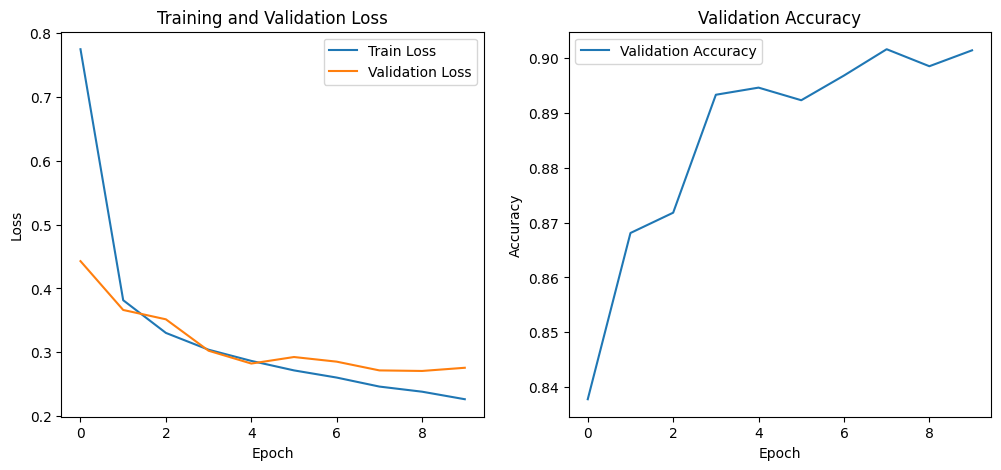

In [ ]:
# Plot training dan validation loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')

plt.show()